# Exploring Toronto Neighbourhoods

In this project we will look into clustering the neighbourhoods in Toronto in terms of similarity of demographics. I will first cluster them, then display these clusters on a map of Toronto. 

In [23]:
import pandas as pd

In [24]:
url='https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'
df=pd.read_html(url)
toronto_df=df[1]
toronto_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by...,Second most common language (after English) by...,Map
1,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
2,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
3,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
4,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN


In [25]:
header=toronto_df.iloc[0]
toronto_df.columns=header
toronto_df.drop([0,1],0,inplace=True)
toronto_df.drop(['Census Tracts','Map','FM','Second most common language (after English) by percentage'],1,inplace=True)

In [26]:
toronto_df.reset_index(drop=True,inplace=True)
toronto_df.head()

,Name,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name
0,Agincourt,44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%)
1,Alderwood,11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%)
2,Alexandra Park,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%)
3,Allenby,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%)
4,Amesbury,17318,3.51,4934,1.1,27546,16.4,19.7,Spanish (6.1%)


In [27]:
toronto_df2=toronto_df['Second most common language (after English) by name'].str.split('(',expand=True)
toronto_df['Second most common language (after English) by name']=toronto_df2[0]

In [28]:
toronto_onehot=pd.get_dummies(toronto_df['Second most common language (after English) by name'])
toronto_df3=toronto_df.join(toronto_onehot)

In [29]:
toronto_df4=toronto_df3.drop(['Name','Second most common language (after English) by name'],1)
toronto_df4.replace('45,792Canada 2011 Census[1]','45792',inplace=True)

# K Means Clustering

In [30]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [31]:
sum_of_squared_distance=[]
K=range(1,7)
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans=kmeans.fit(toronto_df4)
    sum_of_squared_distance.append(kmeans.inertia_)

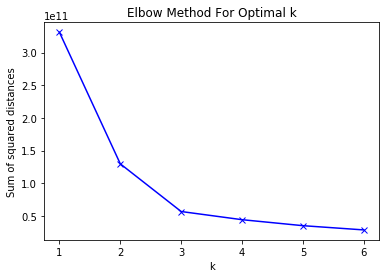

In [32]:
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Thus we see that the best number of clusters is 3.

In [33]:
kmeans2=KMeans(n_clusters=3, random_state=0).fit(toronto_df4)
labels=kmeans2.labels_
toronto_df4.insert(0,'Cluster Labels',labels)

In [34]:
group0=toronto_df4.loc[toronto_df4['Cluster Labels']==0].astype(float)
group1=toronto_df4.loc[toronto_df4['Cluster Labels']==1].astype(float)
group2=toronto_df4.loc[toronto_df4['Cluster Labels']==2].astype(float)

In [35]:
summary=toronto_df4.astype(float).groupby(['Cluster Labels']).mean()
pd.set_option('display.max_columns', 100)
summary.loc['mean']=toronto_df4.astype(float).mean()
summary

,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Bengali,Bulgarian,Cantonese,Filipino,French,Greek,Gujarati,Hindi,Italian,Japanese,Korean,Mandarin,None,Persian,Polish,Portuguese,Punjabi,Russian,Serbian,Somali,Spanish,Tagalog,Tamil,Ukrainian,Unspecified Chinese,Urdu,Vietnamese
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,14942.179310,3.722276,6594.786207,3.891034,34658.358621,16.052414,18.208966,0.020690,0.000000,0.096552,0.062069,0.006897,0.020690,0.006897,0.006897,0.068966,0.006897,0.006897,0.020690,0.006897,0.027586,0.075862,0.158621,0.034483,0.034483,0.006897,0.006897,0.075862,0.000000,0.082759,0.027586,0.103448,0.027586,0.006897
1.0,4300.200000,2.632000,2111.800000,2.340000,242062.000000,7.240000,5.020000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000
2.0,9485.708333,2.320417,4867.750000,9.366667,97847.208333,13.433333,17.191667,0.000000,0.041667,0.041667,0.083333,0.166667,0.041667,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.125000,0.041667,0.000000,0.000000,0.041667,0.000000,0.125000,0.125000,0.000000,0.000000
mean,13883.758621,3.497586,6227.752874,4.601724,49333.936782,15.437931,17.689655,0.017241,0.005747,0.091954,0.063218,0.034483,0.022989,0.005747,0.005747,0.057471,0.005747,0.022989,0.017241,0.005747,0.022989,0.068966,0.132184,0.028736,0.051724,0.011494,0.005747,0.063218,0.005747,0.068966,0.040230,0.114943,0.022989,0.005747


Thus now we can interpret these results.

Cluster 0: Lower income, thus have more renters, more commuters, higher density and larger population. We also see a diverse range of people living in these neighbourhoods. 

Cluster 1: High income, not too diverse with the highest number of people from Hong Kong, and french speaking people with lower population and low density. 

Cluster 2: We see a medium income, large growth in these neighbourhoods with still a large number of renters and commuters and still quite diverse. 

In [36]:
toronto_df4['Name']=toronto_df3['Name']

In [171]:
summary=pd.DataFrame()
summary['Name']=toronto_df3['Name']
summary['Cluster Labels']=toronto_df4['Cluster Labels']

In [38]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import geopy
print('Installed')

Solving environment: done

# All requested packages already installed.

Installed


In [176]:
geolocator=Nominatim(user_agent='foursquare_agent',country_bias='ca')
address=summary['Name'].str.replace('–','/')
address2=address.str.replace(",","/")
address3=address2.str.split('/',expand=True)
address_list=list(address3[0])
summary['Name']=address_list

In [203]:
addresses_latitude=[]
addresses_longitude=[]
for x in address_list:
    try:
        location=geolocator.geocode(x+', Toronto')
        addresses_latitude.append(location.latitude)
        addresses_longitude.append(location.longitude)
    except:
        summary=summary[summary.Name!=x]
        print(x)

Church and Wellesley
Clairville
Distillery District
Elia (Jane and Finch)
Garden District
Humber Bay Shores
Humber Valley Village
Humbermede
Little Italy
Playter Estates
Regal Heights
Scarborough Junction


These are the neighbourhoods that could not be located via Nomanitim and thus will be left out on the map. 

In [209]:
summary['Latitude']=addresses_latitude
summary['Longitude']=addresses_longitude
summary.head()

,Name,Cluster Labels,Latitude,Longitude
0,Agincourt,0,43.785353,-79.278549
1,Alderwood,0,43.601717,-79.545232
2,Alexandra Park,0,43.650758,-79.404298
3,Allenby,1,43.711351,-79.553424
4,Amesbury,0,43.706162,-79.483368


In [259]:
!conda install -c conda-forge folium=0.7.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - folium=0.7.0


The following packages will be UPDATED:

  folium                                         0.5.0-py_0 --> 0.7.0-py_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [228]:
import folium

In [212]:
toronto_location=geolocator.geocode('Toronto')
toronto_latitude=toronto_location.latitude
toronto_longitude=toronto_location.longitude

In [276]:
venues_map=folium.Map(location=[toronto_location.latitude,toronto_location.longitude],zoom_start=13)

In [255]:
cluster0=summary[summary['Cluster Labels']==0]
cluster1=summary[summary['Cluster Labels']==1]
cluster2=summary[summary['Cluster Labels']==2]

In [277]:
for lat, lon in zip(cluster0['Latitude'], cluster0['Longitude']):
            folium.CircleMarker([lat,lon],
                                    radius=5,
                                    popup=None,
                                    color='blue',
                                    fill=True,
                                    fill_color='blue',
                                    fill_opacity=0.6,
                                    ).add_to(venues_map)

        
for lat, lon in zip(cluster1['Latitude'], cluster1['Longitude']):
            folium.CircleMarker([lat,lon],
                                    radius=5,
                                    popup='Ecco',
                                    color='red',
                                    fill=True,
                                    fill_color='red',
                                    fill_opacity=0.6).add_to(venues_map)
        
        
for lat, lon in zip(cluster2['Latitude'], cluster2['Longitude']):
            folium.CircleMarker([lat,lon],
                                    radius=5,
                                    popup=None,
                                    color='green',
                                    fill=True,
                                    fill_color='green',
                                    fill_opacity=0.6).add_to(venues_map)

In [282]:
venues_map

Red= Cluster 2 - Wealthy, not too diverse

Green= Cluster 1 - Middle income, a little diverse

Blue= Cluster 0 - Low Income, diverse